Этапы работы:
Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
Проведите первичный анализ.

Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками

Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

Преобразуйте категориальные признаки.

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

Сформулируйте выводы по проделанной работе.
Кратко опишите какие преобразования были сделаны с данными.
Сравните точность двух моделей.

Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?
Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

In [1]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [47]:
df_adult = pd.read_csv('adult.csv', na_values=['?'])
df_adult.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [35]:
# функция основных метрик взята из моих предыдущих работ
def describe_main(df):
    result = pd.concat([df.describe(), df.mode(numeric_only=True)[:1]]).rename(index={0: 'mode'})
    result = pd.concat([result, df.median(numeric_only=True).to_frame().T]).rename(index={0: 'median'})
    display(result )
    return


describe_main(df_adult)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000
mode,36.000000,2.034880e+05,9.000000,0.000000,0.000000,40.000000
median,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000


In [5]:
# какое кол-во уникальных значений принимают категориальные столбцы
for c in df_adult.select_dtypes(exclude=['int64']).columns:
    print(f'{c}: {len(df_adult[c].unique())}')

workclass: 9
education: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
gender: 2
native-country: 42
income: 2


In [42]:
# процент пропусков по столбцам, пропусков немного
df_adult.isna().mean()*100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [40]:
# проверяем гипотезу что строки с пропуском workclass также содержат пропуски в occupation  - гипотеза подтвердилась
df_adult[df_adult.workclass.isna()].isna().mean()*100

age                  0.000000
workclass          100.000000
fnlwgt               0.000000
education            0.000000
educational-num      0.000000
marital-status       0.000000
occupation         100.000000
relationship         0.000000
race                 0.000000
gender               0.000000
capital-gain         0.000000
capital-loss         0.000000
hours-per-week       0.000000
native-country       1.643444
income               0.000000
dtype: float64

In [31]:
# убираем пропуски, по результатам исследования данных - вполне логично 
df_adult_dna = df_adult.dropna()
df_adult_dna.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [43]:
#итого в работу принято 93% от начальной таблицы
df_adult_dna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


Пропуски можно заполнить, например  медианами(количественные данные) модами(категориальные), 
основываемся на зависимостях  данных внутри таблицы, 
например что hours-per-week может зависить от  occupation 

<Axes: title={'center': 'Процент income по категории workclass'}, ylabel='workclass'>

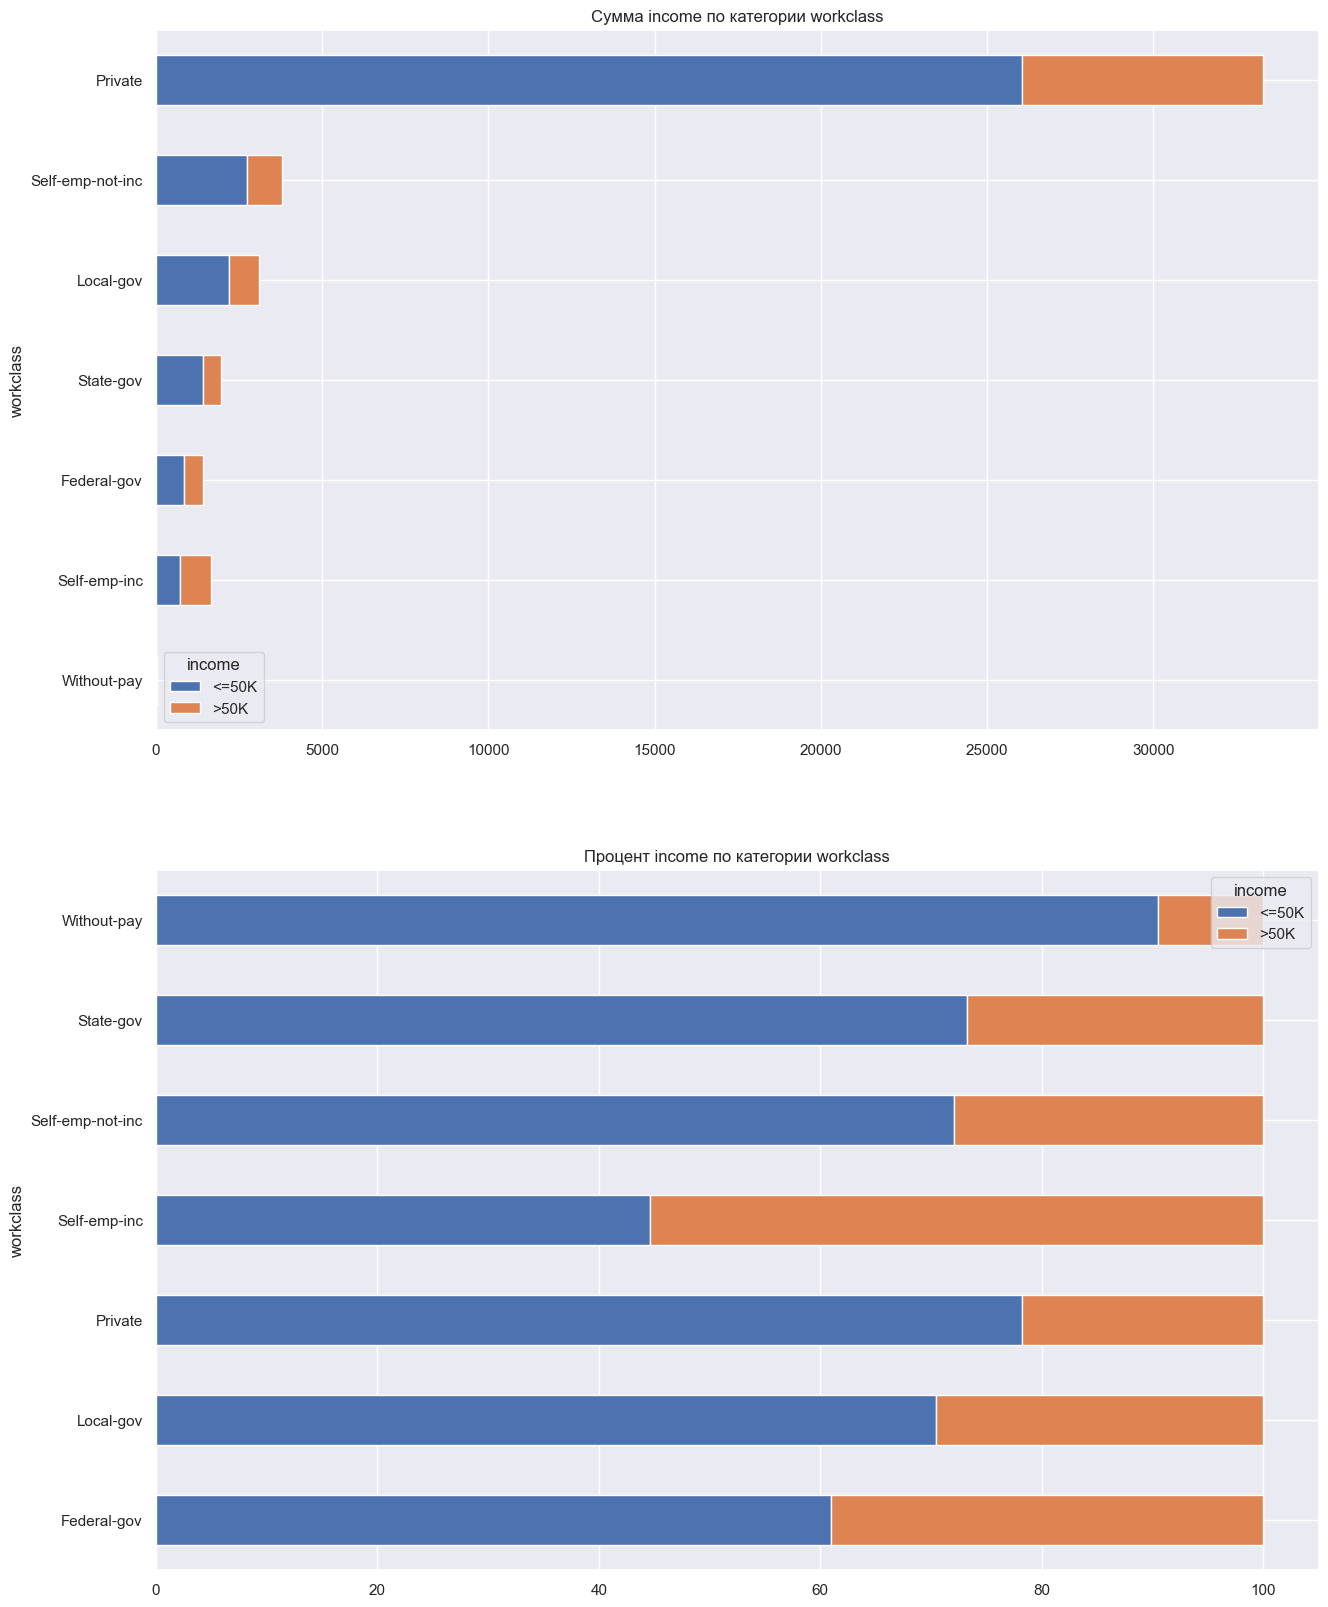

In [52]:
#данными от категории without-pay можно пренебречь
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 20))

a = df_adult_dna.groupby(['workclass', 'income']).size().unstack()

a.sort_values(by='<=50K').plot(ax=axes[0], kind='barh', stacked=True, title='Сумма income по категории workclass')

a['<=50K'] = 100 * a['<=50K'] / (a['>50K'] + a['<=50K'])
a['>50K'] = 100 - a['<=50K']

a.plot(ax=axes[1], kind='barh', stacked=True, title='Процент income по категории workclass')

<Axes: >

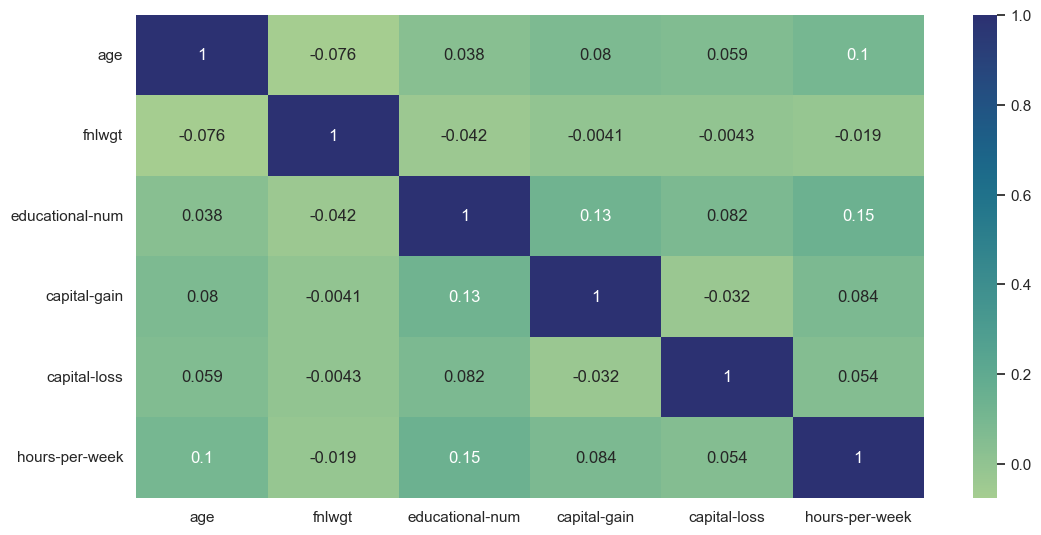

In [9]:
# проверяем гипотезу о наличии корреляции между количественными данными, при наличии корреляции можно убрать часть данных
#- неподтвердилась, корреляция слабая
sns.set(rc={'figure.figsize':(12.7, 6.27)})
sns.heatmap(df_adult_dna.select_dtypes(exclude=['object']).corr(), annot=True, cmap='crest')

<Axes: title={'center': 'Процент income по категории age'}, xlabel='age'>

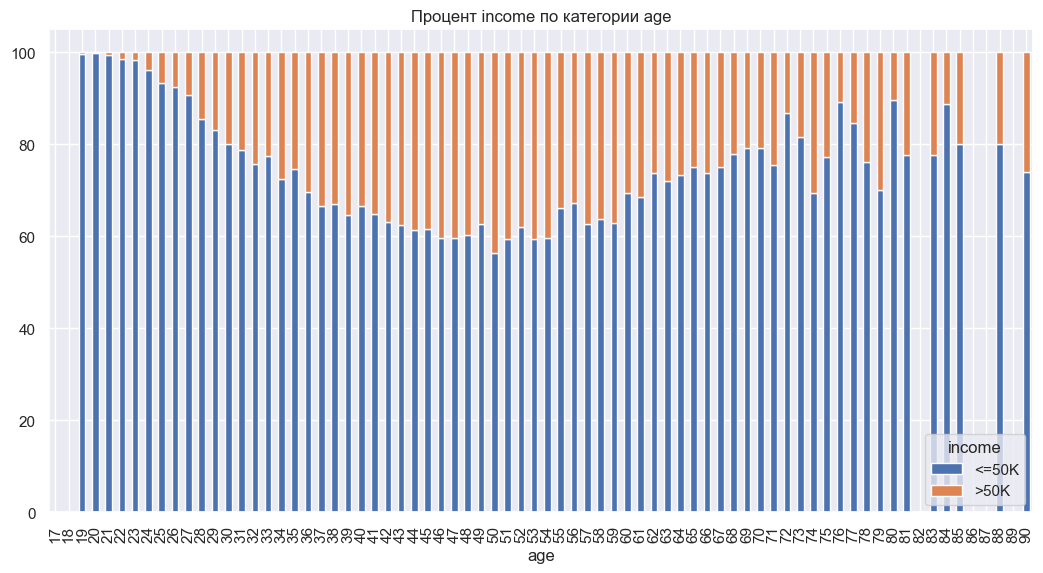

In [49]:
# в возрасте 45-60 наибольшие доходы
a = df_adult_dna.groupby(['age', 'income']).size().unstack()
a['<=50K'] = 100 * a['<=50K'] / (a['>50K'] + a['<=50K'])
a['>50K'] = 100 - a['<=50K']

a.plot(kind='bar', stacked=True, title='Процент income по категории age')

<Axes: title={'center': 'Сумма income по категории race'}, xlabel='race'>

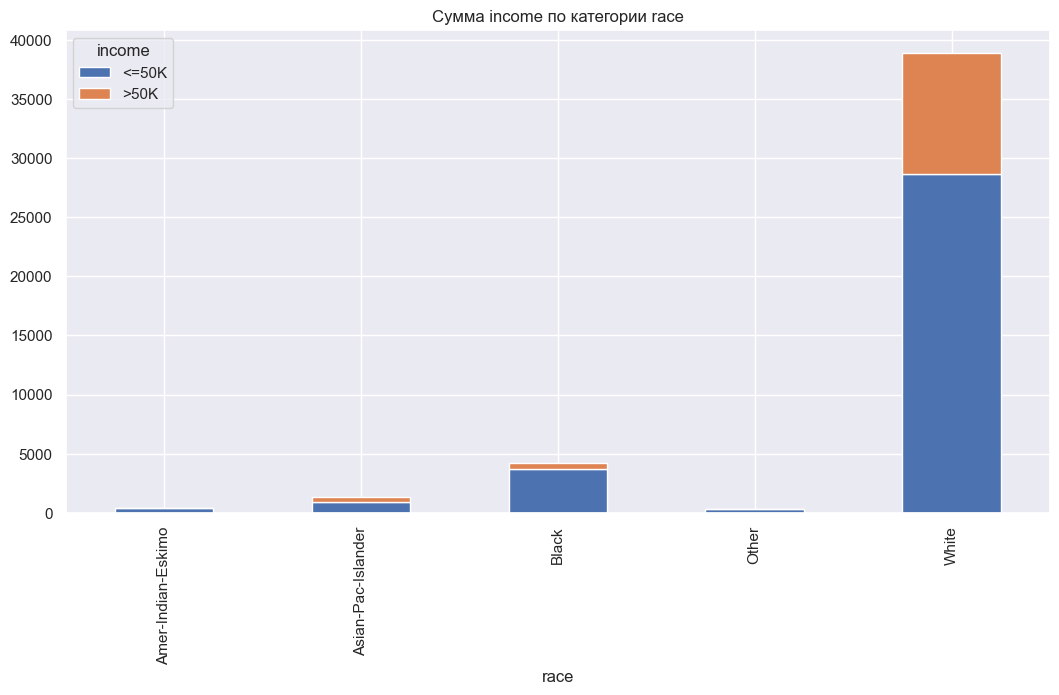

In [51]:
#опрос проводился в основномм среди категории white, двумя категориями можно пренебречь
a = df_adult_dna.groupby(['race', 'income']).size().unstack()

a.plot(kind='bar', stacked=True, title='Сумма income по категории race')

<Axes: title={'center': 'Процент income по категории gender'}, xlabel='gender'>

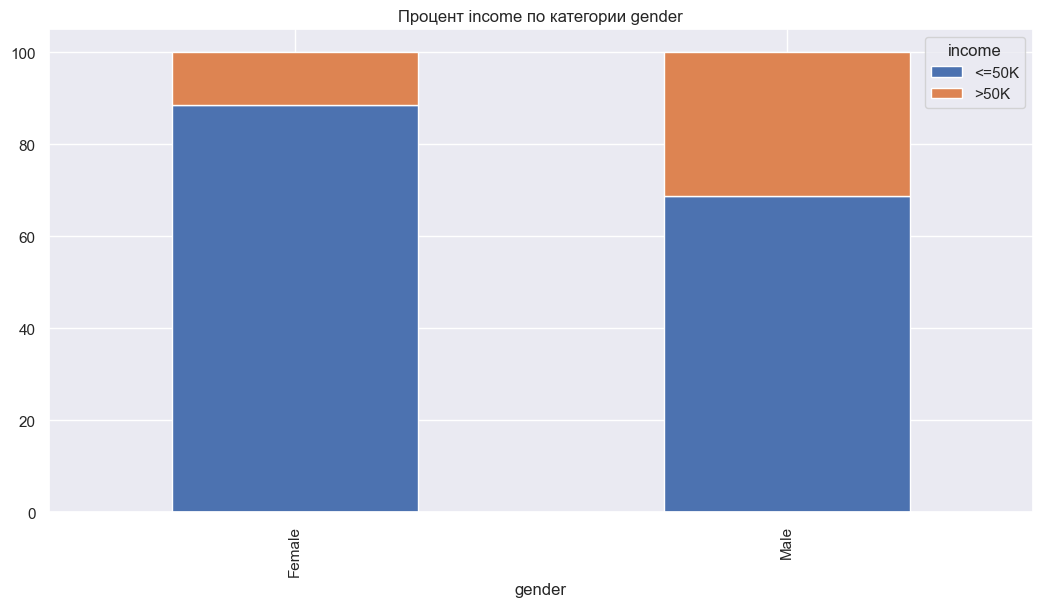

In [53]:
a = df_adult_dna.groupby(['gender', 'income']).size().unstack()
a['<=50K'] = 100 * a['<=50K'] / (a['>50K'] + a['<=50K'])
a['>50K'] = 100 - a['<=50K']

a.plot(kind='bar', stacked=True, title='Процент income по категории gender')

<Axes: title={'center': 'Процент income по категории native-country'}, xlabel='native-country'>

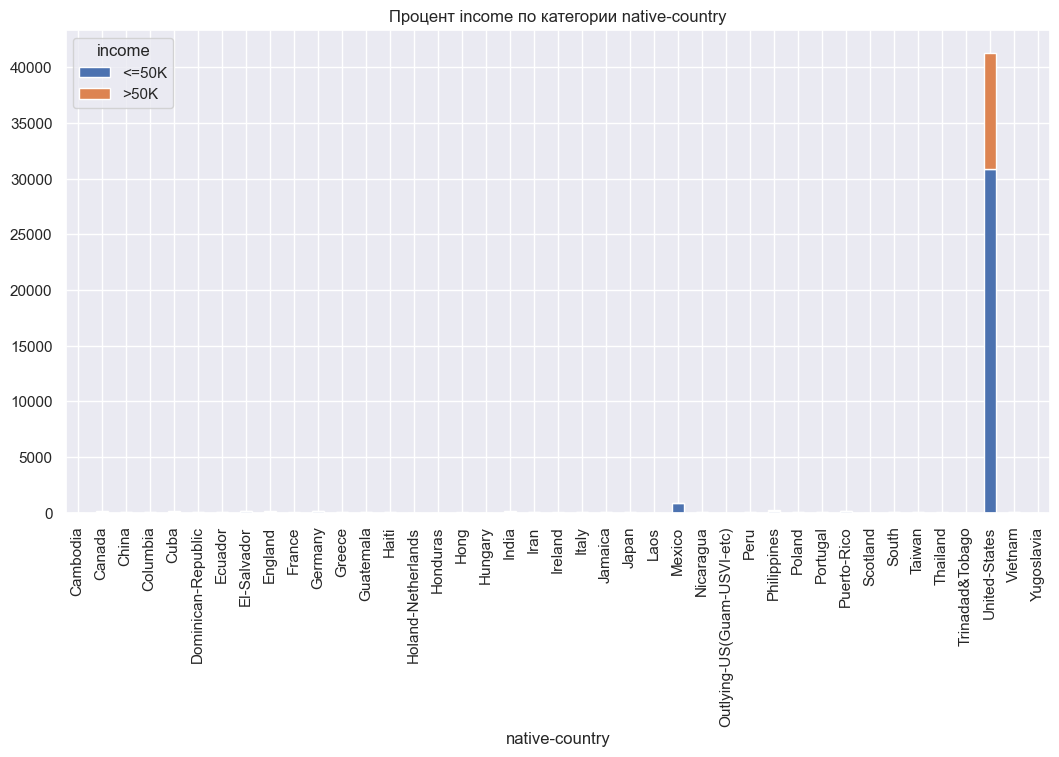

In [57]:
#подавляющее кол-во опросов проходила в США, эти данные можно исключить из выборки 
a = df_adult_dna.groupby(['native-country', 'income']).size().unstack()

a.plot(kind='bar', stacked=True, title='Процент income по категории native-country')


In [114]:
#формируем данные X
X = df_adult_dna.copy()

drop_cols = ['income', 'native-country']

X.drop(drop_cols, axis= 1 , inplace= True )

X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30


In [115]:

X = pd.get_dummies(X, columns=X.select_dtypes(exclude=['int64']).columns)
X.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occup

In [17]:
le = LabelEncoder()
le.fit(df_adult_dna['income'])

LabelEncoder()

In [18]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [19]:
le.transform(['<=50K', '>50K'])

array([0, 1])

In [20]:
le.inverse_transform([1, 1, 0])

array(['>50K', '>50K', '<=50K'], dtype=object)

In [21]:
y = pd.Series(le.transform(df_adult_dna['income']))
y.head(10)

0    0
1    0
2    1
3    1
4    0
5    1
6    0
7    0
8    1
9    0
dtype: int32

In [58]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000)
)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

predictions[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [117]:
model.score(X_train, y_train) 

0.8473542884220502

In [118]:
model.predict_proba(X_test)[:7]

array([[0.99828988, 0.00171012],
       [0.93834924, 0.06165076],
       [0.57675619, 0.42324381],
       [0.99046312, 0.00953688],
       [0.71077532, 0.28922468],
       [0.64359664, 0.35640336],
       [0.28453308, 0.71546692]])

In [119]:
model.score(X_test,y_test)

0.8491928945234761

In [120]:
# SVM
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf')) 
clf.fit(X_train, y_train)

 

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [121]:
clf.score(X_train, y_train)

0.859611435792134

In [122]:
clf.score(X_test, y_test)

0.852730891132896

In [123]:
# SVM
clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3)) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

In [125]:
clf.score(X_train, y_train)

0.855093981993366

In [126]:
clf.score(X_test, y_test)

0.8424117343554213

Наибольшая точность у модели SVM с алгоритмом rbf, при алгоритме poly увеличение степени приводило к ухудшению результата
Все модели справились с задачей.

для улучшения - поработать с данными, как вариант восстановить пропуски